In [72]:
!pip install yfinance
!pip install ta
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge python-kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.2.3-py2.py3-none-any.whl (50 kB)
  Using cached frozendict-2.3.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (110 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.6 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 41.8 MB/s eta 0:00:00
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 25.7 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ta-0.10.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=738d4cfd3ff11bc131e2d04b551eb07e65b3a411ea7a667bf623da47f64a3909
  Stored in directory: /root/.cache/pip/wheels/45/06/ca/92c1cdaf57f0c88b2832cc67cea98beeea9fc5d2e5310dfcc2
Successfully built ta


✨🍰✨ Everything looks OK!
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



In [138]:
# Raw Package
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import datetime
from ta.trend import MACD 

# Market Data 
import yfinance as yf

#Graphing/Visualization
import datetime as dt 
import plotly.graph_objs as go 
import kaleido
import plotly

# Override Yahoo Finance 
yf.pdr_override()

# Create input field for our desired stock 
stock=input("Enter a stock ticker symbol: ")

# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='8y',interval='1d')

print(df)

# Declare plotly figure (go)
fig = go.Figure()
fig1 = go.Figure()
fig2 = go.Figure()

df['MA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['MA100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['MA200'] = df['Close'].ewm(span=200, adjust=False).mean()

macd = MACD(close=df['Close'], 
            window_slow=26,
            window_fast=12, 
            window_sign=9)

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='market data'))

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA50'], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='MA50'))

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA100'], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='MA100'))

fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA200'], 
                         opacity=0.7, 
                         line=dict(color='yellow', width=2), 
                         name='MA200'))

fig.update_layout(
    title= str(stock)+' Live Share Price:',
    yaxis_title='Stock Price (USD per Shares)')               

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=30, label="30d", step="day", stepmode="backward"),
            dict(count=1, label="HTD", step="month", stepmode="todate"),
            dict(count=3, label="3mo", step="month", stepmode="backward"),
            dict(count=6, label="6mo", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Plot volume trace on 1st row
colors = ['green' if row['Open'] - row['Close'] >= 0 
          else 'red' for index, row in df.iterrows()]
fig1.add_trace(go.Bar(x=df.index, 
                     y=df['Volume'],
                     marker_color=colors))

# Plot MACD trace on 2nd row
fig2.add_trace(go.Bar(x=df.index, 
                     y=macd.macd_diff(),
                     marker_color='orange',
                     name='MACD Histogram'))

fig2.add_trace(go.Scatter(x=df.index,
                    y=macd.macd(),
                    line=dict(color='black', width=2),
                    name='MACD line (EMA-26/SLOW)'))

fig2.add_trace(go.Scatter(x=df.index,
                    y=macd.macd_signal(),
                    line=dict(color='blue', width=1),
                    name='Signal line (EMA-12/FAST)'))

fig1.update_yaxes(title_text="Volume")

fig2.update_yaxes(title_text="MACD", showgrid=False)

fig1.update_layout(title='Volume') 

fig2.update_layout(title='MACD(12,26,9)') 

fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=30, label="30d", step="day", stepmode="backward"),
            dict(count=1, label="HTD", step="month", stepmode="todate"),
            dict(count=3, label="3mo", step="month", stepmode="backward"),
            dict(count=6, label="6mo", step="month", stepmode="backward"),
            dict(count=12, label="12mo", step="month", stepmode="backward"),
            dict(count=24, label="24mo", step="month", stepmode="backward")
        ])
    )
)

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=30, label="30d", step="day", stepmode="backward"),
            dict(count=1, label="HTD", step="month", stepmode="todate"),
            dict(count=3, label="3mo", step="month", stepmode="backward"),
            dict(count=6, label="6mo", step="month", stepmode="backward"),
            dict(count=12, label="12mo", step="month", stepmode="backward"),
            dict(count=24, label="24mo", step="month", stepmode="backward")
        ])
    )
)

fig.show()
fig1.show()
fig2.show()

Enter a stock ticker symbol: BTC
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-10-01  100.000000  100.000000  100.000000  100.000000  100.000000       0
2020-10-02  100.000000  100.000000  100.000000  100.000000  100.000000       0
2020-10-05  100.029999  100.040001   99.995003   99.995003   99.995003   10725
2020-10-06  100.010002  100.029999  100.010002  100.029999  100.029999   10080
2020-10-07   99.949997   99.959999   99.919998   99.919998   99.919998    6350
...                ...         ...         ...         ...         ...     ...
2022-12-20   91.184898   91.184898   91.184898   91.184898   91.184898      13
2022-12-21   90.965698   90.965698   90.965698   90.965698   90.965698     171
2022-12-22   90.945198   90.945198   90.945198   90.945198   90.945198       2
2022-12-23   90.771004   90.8

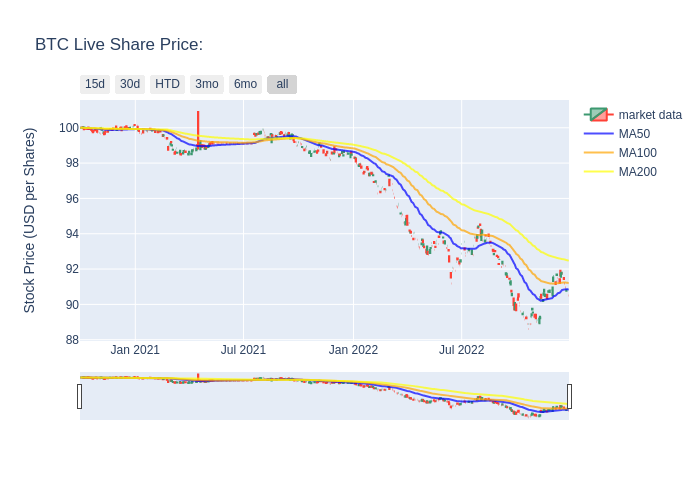

In [140]:
fig.show("png")

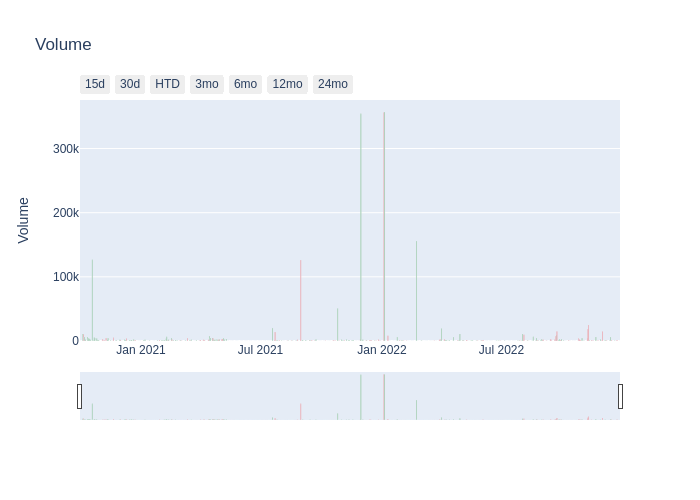

In [141]:
fig1.show("png")

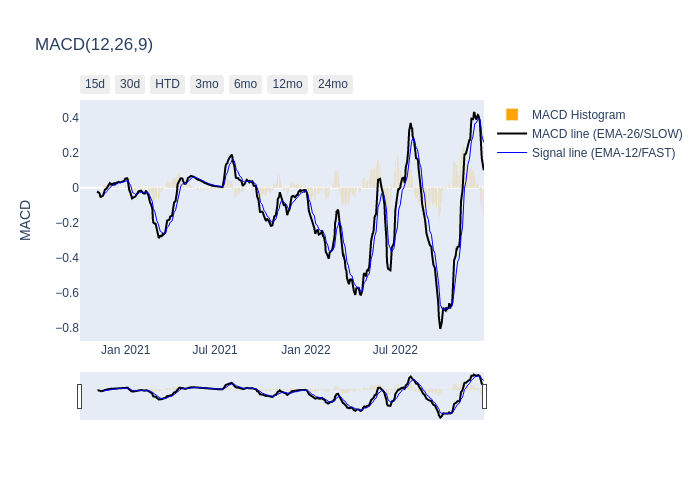

In [142]:
fig2.show("png")

In [143]:
# import modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation
import matplotlib.pyplot as plt
import math

In [144]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200
0,2020-10-01,100.000000,100.000000,100.000000,100.000000,100.000000,0,100.000000,100.000000,100.000000
1,2020-10-02,100.000000,100.000000,100.000000,100.000000,100.000000,0,100.000000,100.000000,100.000000
2,2020-10-05,100.029999,100.040001,99.995003,99.995003,99.995003,10725,99.999804,99.999901,99.999950
3,2020-10-06,100.010002,100.029999,100.010002,100.029999,100.029999,10080,100.000988,100.000497,100.000249
4,2020-10-07,99.949997,99.959999,99.919998,99.919998,99.919998,6350,99.997812,99.998903,99.999451
...,...,...,...,...,...,...,...,...,...,...
559,2022-12-20,91.184898,91.184898,91.184898,91.184898,91.184898,13,90.853103,91.245231,92.539716
560,2022-12-21,90.965698,90.965698,90.965698,90.965698,90.965698,171,90.857518,91.239695,92.524054
561,2022-12-22,90.945198,90.945198,90.945198,90.945198,90.945198,2,90.860957,91.233864,92.508344
562,2022-12-23,90.771004,90.804497,90.760002,90.804497,90.804497,1308,90.858743,91.225361,92.491390


In [145]:
train_dates = pd.to_datetime(df['Date']).dt.date
train_dates

0      2020-10-01
1      2020-10-02
2      2020-10-05
3      2020-10-06
4      2020-10-07
          ...    
559    2022-12-20
560    2022-12-21
561    2022-12-22
562    2022-12-23
563    2022-12-27
Name: Date, Length: 564, dtype: object

In [146]:
df1 = df[['Close', 'Open', 'High', 'Low']]
df1

,Close,Open,High,Low
0,100.000000,100.000000,100.000000,100.000000
1,100.000000,100.000000,100.000000,100.000000
2,99.995003,100.029999,100.040001,99.995003
3,100.029999,100.010002,100.029999,100.010002
4,99.919998,99.949997,99.959999,99.919998
...,...,...,...,...
559,91.184898,91.184898,91.184898,91.184898
560,90.965698,90.965698,90.965698,90.965698
561,90.945198,90.945198,90.945198,90.945198
562,90.804497,90.771004,90.804497,90.760002


In [147]:
df2 = df1.mean(axis=1)
df2

0      100.000000
1      100.000000
2      100.015001
3      100.020000
4       99.937498
          ...    
559     91.184898
560     90.965698
561     90.945198
562     90.785000
563     90.509598
Length: 564, dtype: float64

In [148]:
df3 = np.reshape(df2.values, (len(df2),1))
scaler = MinMaxScaler((0, 1))
df4 = scaler.fit_transform(df3)

In [149]:
train_d = int(len(df4) * 0.8)
test_d = len(df4) - train_d
train_d, test_d = df4[0:train_d,:], df4[train_d:len(df4),:]

In [175]:
import random
random.seed(9)

In [150]:
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)
step_size = 50
X_train, Y_train = new_dataset(train_d, step_size)
X_test, Y_test = new_dataset(test_d, step_size)

In [151]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(step_size,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [152]:
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
13/13 [==============================] - 4s 48ms/step - loss: 0.2266
Epoch 2/10
13/13 [==============================] - 1s 49ms/step - loss: 0.0182
Epoch 3/10
13/13 [==============================] - 1s 47ms/step - loss: 0.0077
Epoch 4/10
13/13 [==============================] - 1s 51ms/step - loss: 0.0049
Epoch 5/10
13/13 [==============================] - 1s 49ms/step - loss: 0.0035
Epoch 6/10
13/13 [==============================] - 1s 52ms/step - loss: 0.0029
Epoch 7/10
13/13 [==============================] - 1s 46ms/step - loss: 0.0024
Epoch 8/10
13/13 [==============================] - 1s 47ms/step - loss: 0.0019
Epoch 9/10
13/13 [==============================] - 1s 48ms/step - loss: 0.0016
Epoch 10/10
13/13 [==============================] - 1s 47ms/step - loss: 0.0013


In [153]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 17ms/step


In [154]:
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train RMSE: %.2f' % (trainScore))

testScore = math.sqrt(mean_squared_error(Y_test, testPredict))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 0.04
Test RMSE: 0.06


In [155]:
trainPredictY = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([Y_train])
testPredictY = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([Y_test])

In [156]:
n_future = 30
y_future = []

x_pred = X_test[-1:, :]       # last observed input sequence
y_pred = testPredict[-1]         # last observed target value

for i in range(n_future):

    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:], y_pred.reshape(1, 1), axis=1)

    # generate the next forecast
    y_pred = model.predict(x_pred)

    # save the forecast
    y_future.append(y_pred.flatten()[0])

1/1 [==============================] - 0s 21ms/step


In [157]:
y_future = np.array(y_future).reshape(-1, 1)
y_future_S = scaler.inverse_transform(y_future)
y_future_S

array([[91.485695],
       [91.48148 ],
       [91.480316],
       [91.48168 ],
       [91.485085],
       [91.490074],
       [91.496254],
       [91.5033  ],
       [91.51095 ],
       [91.519   ],
       [91.52728 ],
       [91.53571 ],
       [91.54421 ],
       [91.55272 ],
       [91.561195],
       [91.56963 ],
       [91.578   ],
       [91.58631 ],
       [91.594536],
       [91.60269 ],
       [91.610756],
       [91.61874 ],
       [91.62664 ],
       [91.634476],
       [91.64222 ],
       [91.6499  ],
       [91.65752 ],
       [91.665054],
       [91.672516],
       [91.67992 ]], dtype=float32)

In [158]:
from datetime import date, timedelta
end = date.today()

start = (date.today()-timedelta(days=30))

new = (date.today()+timedelta(days=1))

last = (date.today()+timedelta(days=30)) 

In [159]:
dff  = pd.DataFrame(columns=['Date', 'Average price predicted for the next 30 days with 50 days windows period'])
dff['Date'] = pd.date_range(end+ pd.Timedelta(days=1), periods=n_future)
dff['Average price predicted for the next 30 days with 50 days windows period'] = y_future_S.flatten()
dff.reset_index()
dff

,Date,Average price predicted for the next 30 days with 50 days windows period
0,2022-12-30,91.485695
1,2022-12-31,91.481483
2,2023-01-01,91.480316
3,2023-01-02,91.481682
4,2023-01-03,91.485085
5,2023-01-04,91.490074
6,2023-01-05,91.496254
7,2023-01-06,91.503304
8,2023-01-07,91.510948
9,2023-01-08,91.518997


In [160]:
data = df1.copy()
data['Average price (actual)'] = data.mean(numeric_only=True, axis=1)
ext_col = df["Date"]
data.insert(0, "Date", ext_col)
data.drop(['Close', 'Open', 'High', 'Low'], axis = 1, inplace = True) 
data

,Date,Average price (actual)
0,2020-10-01,100.000000
1,2020-10-02,100.000000
2,2020-10-05,100.015001
3,2020-10-06,100.020000
4,2020-10-07,99.937498
...,...,...
559,2022-12-20,91.184898
560,2022-12-21,90.965698
561,2022-12-22,90.945198
562,2022-12-23,90.785000


In [161]:
mask = (train_dates > start)
data = data.loc[mask]
data.reset_index()
data

,Date,Average price (actual)
545,2022-11-30,90.724976
546,2022-12-01,91.420547
547,2022-12-02,91.600098
548,2022-12-05,91.216200
549,2022-12-06,91.309998
550,2022-12-07,91.675749
551,2022-12-08,91.512100
552,2022-12-09,91.313904
553,2022-12-12,91.320351
554,2022-12-13,91.769951


In [162]:
frames = [data, dff]
result = pd.concat(frames)
display(result)

,Date,Average price (actual),Average price predicted for the next 30 days with 50 days windows period
545,2022-11-30,90.724976,NaN
546,2022-12-01,91.420547,NaN
547,2022-12-02,91.600098,NaN
548,2022-12-05,91.216200,NaN
549,2022-12-06,91.309998,NaN
550,2022-12-07,91.675749,NaN
551,2022-12-08,91.512100,NaN
552,2022-12-09,91.313904,NaN
553,2022-12-12,91.320351,NaN
554,2022-12-13,91.769951,NaN


In [163]:
step_size = 100
X1_train, Y1_train = new_dataset(train_d, step_size)
X1_test, Y1_test = new_dataset(test_d, step_size)

In [164]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(step_size,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [165]:
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X1_train,Y1_train,epochs=10,batch_size=32)

Epoch 1/10
11/11 [==============================] - 5s 94ms/step - loss: 0.2078
Epoch 2/10
11/11 [==============================] - 1s 105ms/step - loss: 0.0225
Epoch 3/10
11/11 [==============================] - 1s 94ms/step - loss: 0.0098
Epoch 4/10
11/11 [==============================] - 1s 94ms/step - loss: 0.0056
Epoch 5/10
11/11 [==============================] - 1s 95ms/step - loss: 0.0044
Epoch 6/10
11/11 [==============================] - 1s 96ms/step - loss: 0.0033
Epoch 7/10
11/11 [==============================] - 1s 97ms/step - loss: 0.0027
Epoch 8/10
11/11 [==============================] - 1s 90ms/step - loss: 0.0023
Epoch 9/10
11/11 [==============================] - 1s 90ms/step - loss: 0.0020
Epoch 10/10
11/11 [==============================] - 1s 92ms/step - loss: 0.0017


In [166]:
trainPredict1 = model.predict(X1_train)
testPredict1 = model.predict(X1_test)

1/1 [==============================] - 0s 43ms/step


In [167]:
trainScore1 = math.sqrt(mean_squared_error(Y1_train, trainPredict1))
print('Train RMSE: %.2f' % (trainScore1))

testScore1 = math.sqrt(mean_squared_error(Y1_test, testPredict1))
print('Test RMSE: %.2f' % (testScore1))

Train RMSE: 0.04
Test RMSE: 0.04


In [168]:
trainPredictY1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([Y1_train])
testPredictY1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([Y1_test])

In [169]:
n_future = 30
y1_future = []

x1_pred = X1_test[-1:, :]       # last observed input sequence
y1_pred = testPredict1[-1]         # last observed target value

for i in range(n_future):

    # feed the last forecast back to the model as an input
    x1_pred = np.append(x1_pred[:, 1:], y1_pred.reshape(1, 1), axis=1)

    # generate the next forecast
    y1_pred = model.predict(x1_pred)

    # save the forecast
    y1_future.append(y1_pred.flatten()[0])

1/1 [==============================] - 0s 28ms/step


In [170]:
y1_future = np.array(y1_future).reshape(-1, 1)
y1_future_S = scaler.inverse_transform(y1_future)
y1_future_S

array([[91.73469 ],
       [91.74059 ],
       [91.75405 ],
       [91.77338 ],
       [91.79706 ],
       [91.82387 ],
       [91.85282 ],
       [91.883194],
       [91.91443 ],
       [91.94615 ],
       [91.97808 ],
       [92.010025],
       [92.04186 ],
       [92.07351 ],
       [92.10491 ],
       [92.136024],
       [92.16684 ],
       [92.19734 ],
       [92.22753 ],
       [92.25741 ],
       [92.28697 ],
       [92.31623 ],
       [92.34519 ],
       [92.37385 ],
       [92.40222 ],
       [92.430305],
       [92.4581  ],
       [92.485634],
       [92.512886],
       [92.53988 ]], dtype=float32)

In [171]:
dff1 = pd.DataFrame(columns=['Date', 'Average price predicted for the next 30 days with 100 days windows period'])
dff1['Date'] = pd.date_range(end+ pd.Timedelta(days=1), periods=n_future)
dff1['Average price predicted for the next 30 days with 100 days windows period'] = y1_future_S.flatten()
dff1.reset_index()
dff1

,Date,Average price predicted for the next 30 days with 100 days windows period
0,2022-12-30,91.734688
1,2022-12-31,91.740593
2,2023-01-01,91.754051
3,2023-01-02,91.773376
4,2023-01-03,91.797058
5,2023-01-04,91.823868
6,2023-01-05,91.852821
7,2023-01-06,91.883194
8,2023-01-07,91.914429
9,2023-01-08,91.946152


In [172]:
frames1 = [data, dff, dff1]
result1 = pd.concat(frames1)
display(result1)

,Date,Average price (actual),Average price predicted for the next 30 days with 50 days windows period,Average price predicted for the next 30 days with 100 days windows period
545,2022-11-30,90.724976,NaN,NaN
546,2022-12-01,91.420547,NaN,NaN
547,2022-12-02,91.600098,NaN,NaN
548,2022-12-05,91.216200,NaN,NaN
549,2022-12-06,91.309998,NaN,NaN
...,...,...,...,...
25,2023-01-24,NaN,NaN,92.430305
26,2023-01-25,NaN,NaN,92.458099
27,2023-01-26,NaN,NaN,92.485634
28,2023-01-27,NaN,NaN,92.512886


In [173]:
import plotly.express as px 
# plotting the line chartedicted for the next 30 days with 200 days windows period"])
figx = px.line(result1, x="Date", y=["Average price (actual)"])
figx.add_trace(go.Scatter(x=result1["Date"], y=result1["Average price predicted for the next 30 days with 50 days windows period"],
                    mode='lines',
                    name='Average price predicted for the next 30 days with 50 days windows period'))
figx.add_trace(go.Scatter(x=result1["Date"], y=result1["Average price predicted for the next 30 days with 100 days windows period"],
                    mode='lines',
                    name='Average price predicted for the next 30 days with 100 days windows period'))
figx.update_yaxes(title_text="Price (in $)") 
# showing the plot
figx.show()

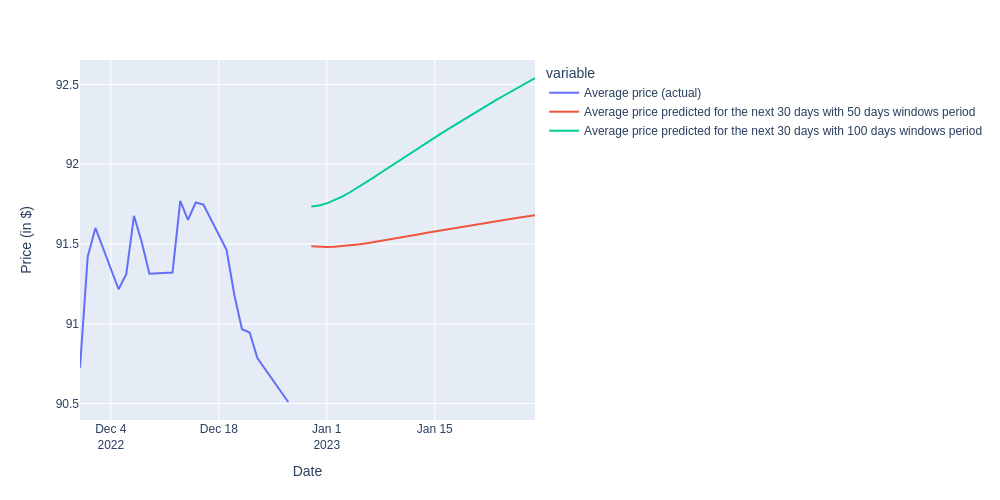

In [174]:
figx.show("png", width=1000)